<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE = 12345
pd.options.mode.chained_assignment = None

In [2]:
def study(data): 
    info = display(data.head(10)), data.info(), display(data.describe())

In [3]:
#Загружаем данные

data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [4]:
#Загружаем данные

data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [5]:
#Загружаем данные

data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [6]:
#Посмотрим данные обучающей выборки

study(data_train)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [7]:
#Посмотрим данные тестовой выборки

study(data_test)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
5,2017-12-09 19:59:59,5.848338,6.234198,4.468803,37.816555,547.515088,85.875864,8.040386,7.500718,1201.408796,...,22.977833,-499.910098,20.000113,-500.584093,18.003899,-500.326371,12.978611,-499.966502,19.988673,-500.742891
6,2017-12-09 20:59:59,6.172839,6.213598,4.458071,36.829223,518.363800,73.426294,7.641859,7.498470,1198.551240,...,22.964590,-500.083299,20.010567,-500.545746,18.040164,-498.936442,12.988702,-499.985412,20.014155,-499.443855
7,2017-12-09 21:59:59,5.743825,6.264367,4.428267,37.170131,500.494798,75.915232,7.230213,7.496599,1201.172468,...,23.010484,-500.498525,20.043525,-499.701442,17.991164,-500.324632,13.000809,-500.181711,20.001605,-500.229965
8,2017-12-09 22:59:59,5.558520,6.167472,4.370640,37.356892,540.990643,79.668503,7.089240,7.524634,1195.305111,...,22.979813,-500.451722,19.995022,-500.415107,18.057379,-499.238503,13.011922,-500.067255,20.002796,-504.347015
9,2017-12-09 23:59:59,5.473143,6.076597,4.274908,38.631317,492.146649,90.792119,7.367698,6.543369,1203.076302,...,23.050901,-501.185001,20.016755,-499.840744,17.991566,-500.303770,13.023215,-500.018271,20.015115,-515.537548


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [8]:
#Посмотрим полные данные

study(data_full)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


Можем заметить, что в столбцах имеются пропуски, нужно будет их обработать. Также тип данных в столбце **date** необходимо будет заменить на **datetime**. Проверим данные на явные дубликаты.

In [9]:
data_train.duplicated().sum()

0

In [10]:
data_test.duplicated().sum()

0

In [11]:
data_full.duplicated().sum()

0

Явных дубликатов не выявлено. Изменим тип данных в столбце **date**.

In [12]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64       
 8   roughe

In [13]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

In [14]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19339 non-null  float64       
 4   rougher.input.feed_sol                              19340 non-null  float64       
 5   rougher.input.feed_rate                             19428 non-null  float64       
 6   rougher.input.feed_size                             19294 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64       
 8   roughe

In [15]:
#Напишем функцию, которая произведет подсчет пропусков в каждом столбце
def count_pass(data):
    for column in data.columns:
        return print('Количество пропусков в каждом столбце:'), print(data.isna().sum())  

In [16]:
#Сделаем вызов функции count_pass

count_pass(data_train)

Количество пропусков в каждом столбце:
date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64


(None, None)

In [17]:
#Сделаем вызов функции count_pass

count_pass(data_test)

Количество пропусков в каждом столбце:
date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.sta

(None, None)

In [18]:
#Сделаем вызов функции count_pass

count_pass(data_full)

Количество пропусков в каждом столбце:
date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64


(None, None)

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.  Пропуски заполним предыдущим значением. 

In [19]:
#Произведем заполнение пропусков

data_train = data_train.ffill(axis=0)

data_test = data_test.ffill(axis=0)

data_full = data_full.ffill(axis=0)

print('Количество пропусков:', data_train.isna().sum())
print('Количество пропусков:', data_test.isna().sum())
print('Количество пропусков:', data_full.isna().sum())

Количество пропусков: date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64
Количество пропусков: date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0

# Анализ признаков, недоступных в тестовой выборке.

In [20]:
#Выделим признаки в данных

full_signs = data_full.columns

test_signs = data_test.columns

In [21]:
difference_signs = pd.Series(list(set(full_signs) - set(test_signs)))

difference_signs

0                        primary_cleaner.output.tail_au
1                                rougher.output.tail_ag
2                        primary_cleaner.output.tail_ag
3                                 final.output.tail_sol
4                       rougher.calculation.au_pb_ratio
5                       primary_cleaner.output.tail_sol
6                           final.output.concentrate_pb
7                                  final.output.tail_ag
8                        primary_cleaner.output.tail_pb
9                           final.output.concentrate_ag
10                                 final.output.tail_pb
11                         final.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                     secondary_cleaner.output.tail_pb
14               primary_cleaner.output.concentrate_sol
15                              rougher.output.recovery
16                     secondary_cleaner.output.tail_au
17    rougher.calculation.floatbank11_sulfate_to

Отсутствующие признаки разделились на 2 категории:

- Признаки, которые являются параметрами продукта

- Признаки, которые являются расчётными характеристиками

Также, можем заметить, что отсутствуют такие признаки, как rougher.output.recovery и final.output.recovery, которые в дальнейшем нам понадобятся для расчета метрики, поэтому добавим их в тестовую выборку. 

In [22]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

data_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

# Проверка эффективности обогащения

Эффективность обогащения можно рассчитать по формуле:

Recovery = ((Cх(F-T))/(Fx(C-T)))*100%

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

Исходя из наших данных(обучающая выборка):

C - rougher.output.concentrate_au;

F - rougher.input.feed_au;

T - rougher.output.tail_au.

Нужно найти MAE между нашими расчетами эффективности обогащения и значением признака(rougher.output.recovery).



In [23]:
#Назначим переменные и произведем расчет по формуле

c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']

recovery = ((c*(f-t))/(f*(c-t))) * 100

In [24]:
#Найдем MAE

print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE: 9.83758577644259e-15


Отклонение МАЕ мало, а это значит, что расчеты произведены верно.

Для дальнейшего обучения модели столбец **date** нам не понадобится, удалим его в обучающей и тестовой выборках.

In [25]:
data_train = data_train.drop('date', axis=1)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14579 non-null  float64
 3   rougher.input.feed_sol                              14579 non-null  float64
 4   rougher.input.feed_rate                             14579 non-null  float64
 5   rougher.input.feed_size                             14579 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14579 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14579 non-null  float64
 8   rougher.state.floatbank10_a_air                     14579 non-null  float64


In [26]:
data_test = data_test.drop('date', axis=1)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 4859
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4860 non-null   float64
 3   rougher.input.feed_sol                      4860 non-null   float64
 4   rougher.input.feed_rate                     4860 non-null   float64
 5   rougher.input.feed_size                     4860 non-null   float64
 6   rougher.input.floatbank10_sulfate           4860 non-null   float64
 7   rougher.input.floatbank10_xanthate          4860 non-null   float64
 8   rougher.state.floatbank10_a_air             4860 non-null   float64
 9   rougher.state.floatbank10_a_level           4860 non-null   float64
 10  rougher.stat

# Вывод

Работа, которую мы провели:

- Открыли и изучили предоставленные нам данные;

- Изменили тип данных столбца **date**, в конце, выполняя предобработку данных, удалили его за ненадобностью для обучения;

- Проверили на явные дубликаты, их не оказалось;

- Нашли много пропусков, которые отсутствуют по причине продолжительных расчетов или замеров. Было принято решение заменить их на предыдущие значения, так как соседние параметры часто схожи;

- Провели анализ признаков, которые отсутствуют в тестовой выборке. Добавили в нее недостающие параметры, которые пригодятся нам в дальнейшем для расчета необходимой метрики;

- Проверили расчет эффективности обогащения. Отклонение МАЕ оказалочь небольшим, что говорит нам о правильности расчетов.

## Анализ данных

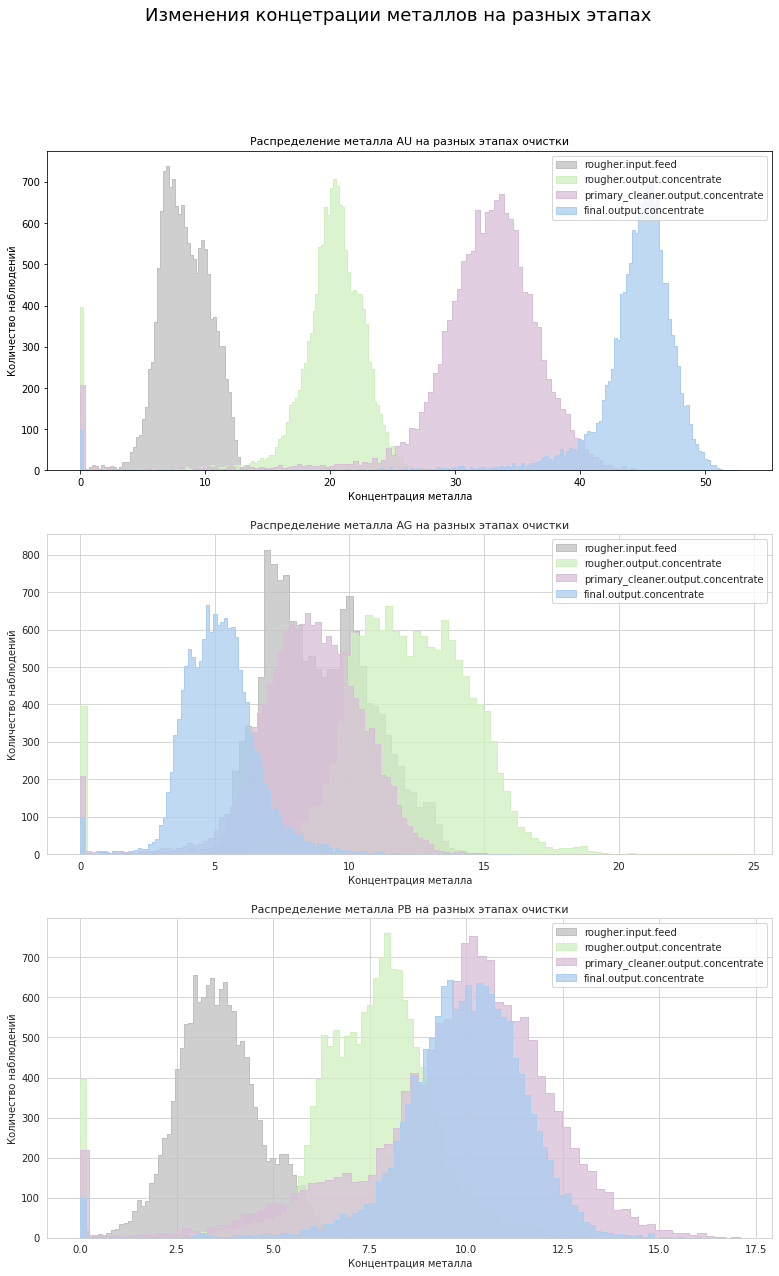

In [27]:
count = 0

plt.figure(figsize=[13, 20])
plt.suptitle('Изменения концетрации металлов на разных этапах', fontsize=18)
for i in ['au', 'ag', 'pb']:
    count += 1
    plt.subplot(3, 1, count)
    plt.title(f'Распределение металла {str(i).upper()} на разных этапах очистки', fontsize=11)
    sns.set_style('whitegrid')
    sns.histplot(data_train[f'rougher.input.feed_{i}'], label='rougher.input.feed', 
                 element="step", color='#C0C0C0', kde=False)
    sns.histplot(data_train[f'rougher.output.concentrate_{i}'], label='rougher.output.concentrate', 
                 element="step", color='#D0F0C0', kde=False)
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{i}'], label='primary_cleaner.output.concentrate', 
                 element="step", color='#D8BFD8', kde=False)
    sns.histplot(data_train[f'final.output.concentrate_{i}'], label='final.output.concentrate', 
                 element="step", color='#ABCDEF', kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

Первое, что бросается в глаза - это аномалии на нулевых значениях. Можем наблюдать, что концетрация золота повышется с каждым этапом. Концетрация серебра повышается до определенного момента, покак не начался этап primary_cleaner. У свинца виден постепенный рост в концетрации, но она начинает падать на этапе final.output. После анализа данных необходимо будет удалить аномалии, чтобы в дальнейшем они не испортили нам обучение модели.

# Распределения размеров гранул исходного сырья на обучающей и тестовой выборках

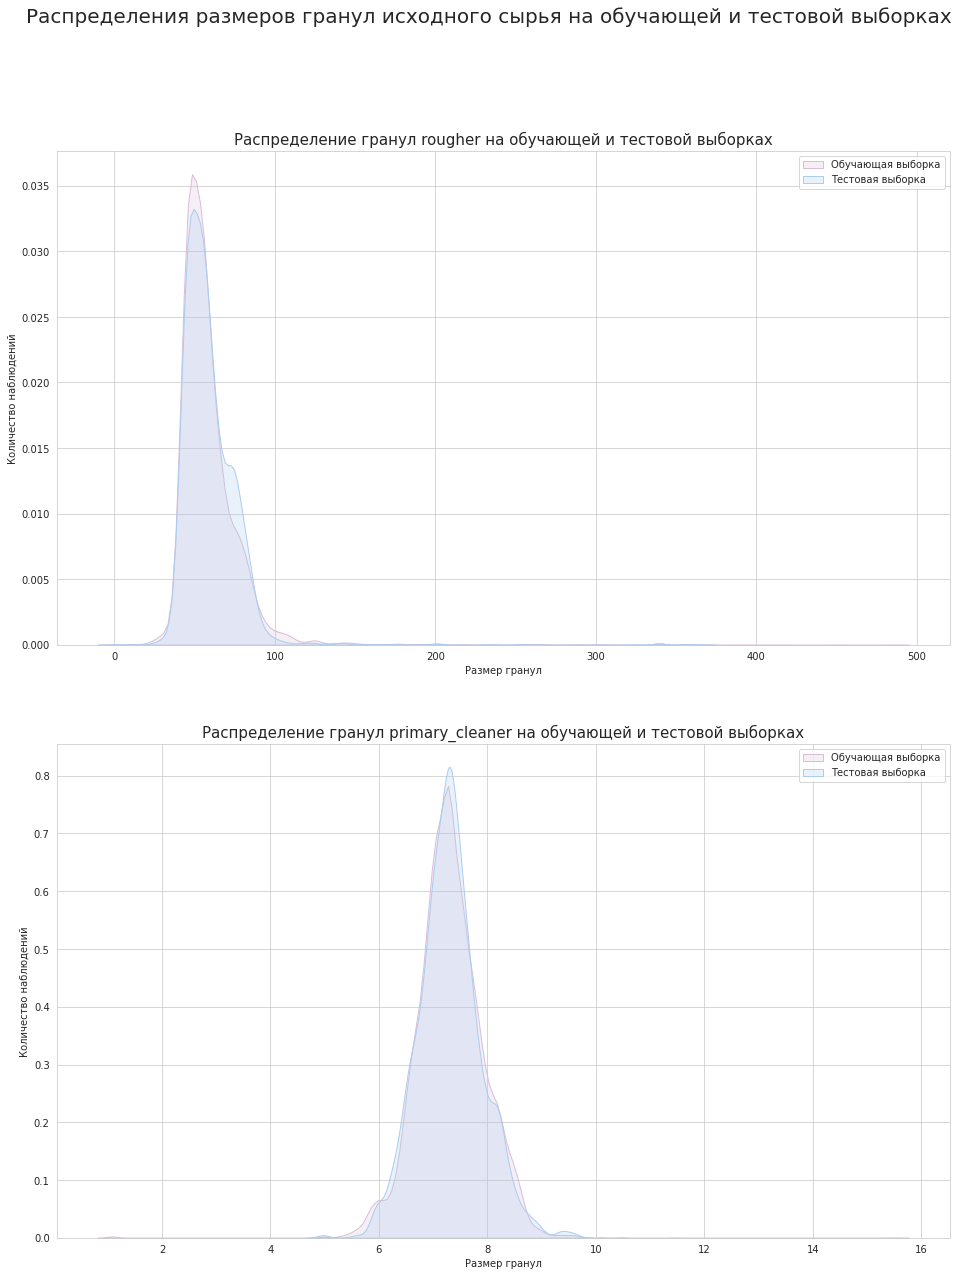

In [28]:
count = 0

plt.figure(figsize=[16, 20])
plt.suptitle('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках', fontsize=20)
for i in ['rougher', 'primary_cleaner']:
    count += 1
    plt.subplot(2, 1, count)
    plt.title(f'Распределение гранул {str(i)} на обучающей и тестовой выборках', fontsize=15)
    sns.kdeplot(data_train[f'{i}.input.feed_size'], label='Обучающая выборка', 
                 color='#D8BFD8', shade=True)
    sns.kdeplot(data_test[f'{i}.input.feed_size'], label='Тестовая выборка', 
                 color='#ABCDEF', shade=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

Распределение гранул практически идентично, учитывая тот факт, что тестовая выборка меньше размером, соответственно, и количество наблюдений и размеров в этой выборке будет меньше. На этапе флотации(rougher), можем заметить много выбросов, начиная, примерно с 100 размера гранул. 

# Суммарная концентрация металлов на разных стадиях: 

**в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.**

In [29]:
#Суммарная концетрация металлов в сырье

concetrate_sum_feedstock = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb']\
                                                              + data_full['rougher.input.feed_au']

concetrate_sum_feedstock.describe()

count    19439.000000
mean        20.645541
std          4.481676
min          0.030000
25%         17.252879
50%         20.141216
75%         23.797381
max         33.498784
dtype: float64

In [30]:
#Суммарная концетрация металлов в черновом концентрате

concetrate_sum_rougher = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb']\
                                                                    + data_full['rougher.output.concentrate_au']
concetrate_sum_rougher.describe()

count    19439.000000
mean        39.373032
std          6.863389
min          0.000000
25%         38.394639
50%         40.312648
75%         42.365102
max         55.568687
dtype: float64

In [31]:
#Суммарная концетрация металлов после первой очистки

concetrate_sum_primary_cleaner = data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_pb']\
                                                                                    + data_full['primary_cleaner.output.concentrate_au']

concetrate_sum_primary_cleaner.describe()

count    19439.000000
mean        50.371085
std          7.628857
min          0.000000
25%         50.054875
50%         51.909630
75%         53.386898
max         60.269003
dtype: float64

In [32]:
#Суммарная концетрация металлов в финальном концетрате

concetrate_sum_final = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb']\
                                                                + data_full['final.output.concentrate_au']
concetrate_sum_final.describe()

count    19439.000000
mean        59.223721
std          6.095138
min          0.000000
25%         59.298323
50%         60.306921
75%         61.096667
max         64.968881
dtype: float64

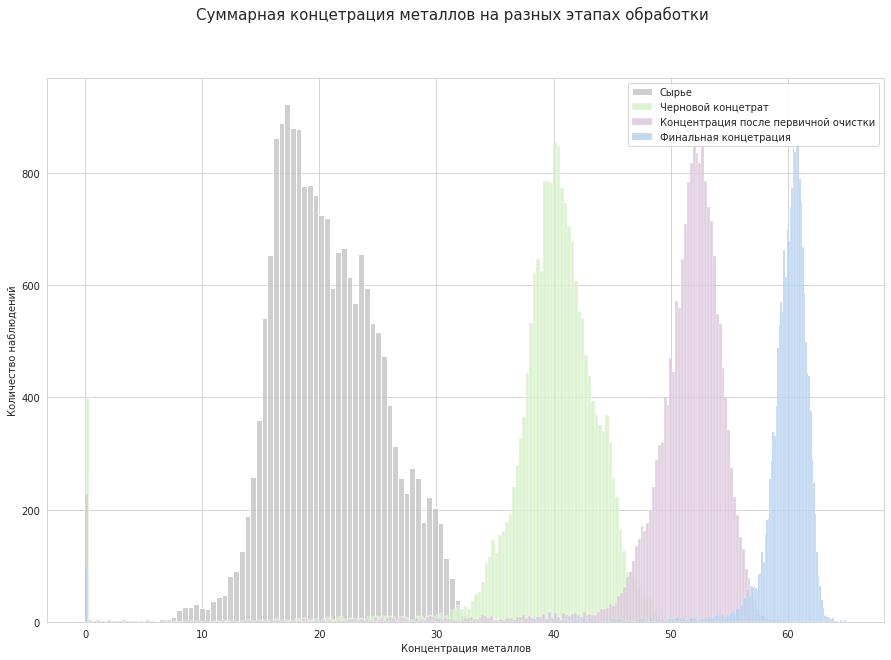

In [33]:
plt.figure(figsize=[15, 10])
plt.suptitle('Суммарная концетрация металлов на разных этапах обработки', fontsize=15)
sns.set_style('whitegrid')
sns.histplot(concetrate_sum_feedstock, color='#C0C0C0', label='Сырье')
sns.histplot(concetrate_sum_rougher, color='#D0F0C0', label='Черновой концетрат')
sns.histplot(concetrate_sum_primary_cleaner, color='#D8BFD8', label='Концентрация после первичной очистки')
sns.histplot(concetrate_sum_final, color='#ABCDEF', label='Финальная концетрация')
plt.xlabel('Концентрация металлов')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

Суммарная концентрация металлов достигает своего максимума на этапе финальной концетрации, а диапозон значений концентрации от этапа к этапу уменьшается. Снова видим аномалии на нулевых значениях. Удалим их перед тем как обучать модель. 

In [34]:
#Избавимся от нулевых значений в data_full

data_full = data_full[(data_full['rougher.output.concentrate_au'] != 0) & (data_full['rougher.output.concentrate_ag'] != 0)\
                                                                        & (data_full['rougher.output.concentrate_pb'] != 0)]

data_full = data_full[(data_full['primary_cleaner.output.concentrate_au'] != 0) & (data_full['primary_cleaner.output.concentrate_ag'] != 0)\
                                                                      & (data_full['primary_cleaner.output.concentrate_pb'] != 0)]

data_full = data_full[(data_full['final.output.concentrate_au'] != 0) & (data_full['final.output.concentrate_ag'] != 0)\
                                                                      & (data_full['final.output.concentrate_pb'] != 0)]                                                                  

In [35]:
#Избавимся от нулевых значений в data_train

data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0) & (data_train['rougher.output.concentrate_ag'] != 0)\
                                                                        & (data_train['rougher.output.concentrate_pb'] != 0)]

data_train = data_train[(data_train['primary_cleaner.output.concentrate_au'] != 0) & (data_train['primary_cleaner.output.concentrate_ag'] != 0)\
                                                                      & (data_train['primary_cleaner.output.concentrate_pb'] != 0)]

data_train = data_train[(data_train['final.output.concentrate_au'] != 0) & (data_train['final.output.concentrate_ag'] != 0)\
                                                                      & (data_train['final.output.concentrate_pb'] != 0)]


## Модель

In [36]:
#Напишем функцию для расчета sMAPE

def smape(y,y_pred):
    smape_metric = np.mean(abs(y - y_pred)/((abs(y)+abs(y_pred))/2))*100
    return smape_metric

In [37]:
#Напишем функцию для расчета итоговой sMAPE

def final_smape(rougher,final):
    final_smape_metric = (0.25*rougher + 0.75*final)
    return final_smape_metric

Разделиим выборки на признаки, в том числе и целевые. У нас их будет 2: эффективность обогащения чернового концентрата rougher.output.recovery и эффективность обогащения финального концентрата final.output.recovery. Признаки в выборках должны быть одинаковые.

In [38]:
columns = data_test.columns

features_train = data_train[columns].drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

#Посмотрим размеры выборок
print(features_train.shape)
print(features_test.shape)

(13982, 52)
(4860, 52)


In [39]:
#Масштабируем данные обучающей выборки

scaler = StandardScaler()

scaler.fit(features_train)

features_train = scaler.transform(features_train)

features_test = scaler.transform(features_test)

Перед нами задача регрессии. Рассмотрим следующие модели - DecisionTreeRegressor, RandomForestRegressor, LinearRegression.

In [40]:
#Создадим счетчик функции

smape_score = make_scorer(smape, greater_is_better = False)

# DecisionTreeRegressor

In [41]:
#Создадим переменные, которые помогут нам в вычислениях

best_result_dt = 50 #Число для сравнения лучшего финального sMAPE
best_depth = 0 #Счетчик для параметра max_depth
for i in range(1, 15, 1):        #С помощью цикла подберем лучший параметр max_depth для модели 
    model_dt_rougher = DecisionTreeRegressor(max_depth=i, random_state=RANDOM_STATE) #Модель для rougher.output.recovery
    smape_rougher = cross_val_score(model_dt_rougher, features_train, target_train_rougher, 
                                    scoring=smape_score, cv=5, n_jobs=-1)
    final_smape_rougher = smape_rougher.mean() #Вычисление sMAPE для rougher.output.recovery

    model_dt_final = DecisionTreeRegressor(max_depth=i, random_state=RANDOM_STATE) #Модель для final.output.recovery
    smape_final = cross_val_score(model_dt_final, features_train, target_train_final,
                                  scoring=smape_score, cv=5, n_jobs=-1)
    final_smape_final = smape_final.mean()  #Вычисление sMAPE для final.output.recovery
    result_smape = final_smape(final_smape_rougher, final_smape_final)*(-1) #Итоговое sMAPE
    if result_smape < best_result_dt:   #Выбираем лучшие результаты
        best_result_dt = result_smape
        best_depth = i

print('Итоговый sMAPE:', best_result_dt, 'Лучший параметр max_depth:', best_depth)

Итоговый sMAPE: 8.652958121318008 Лучший параметр max_depth: 3


# RandomForestRegressor

Рассмотрим по отдельности модели для rougher.output.recovery и final.output.recovery, так как находить параметры для RandomForestRegressor оказалось по времени очень затратно.

In [42]:
#Найдем параметры для модели rougher.output.recovery
best_result_rf_rougher = 50 #Число для сравнения лучшего sMAPE
best_depth = 0 #Счетчик параметра max_depth
best_esti = 0 #Счетчик параметра n_estimators
for i in range(1, 15, 5):
    for n in range(1, 50, 5):
        model_rf_rougher = RandomForestRegressor(max_depth=i, n_estimators=n, random_state=RANDOM_STATE)
        smape_rougher = cross_val_score(model_rf_rougher,
                                        features_train,
                                        target_train_rougher,
                                        scoring=smape_score,
                                        cv=5, n_jobs=-1)
        final_smape_rougher = smape_rougher.mean() #Вычисление sMAPE
        if final_smape_rougher < best_result_rf_rougher:
            best_result_rf_rougher = final_smape_rougher
            best_depth = i
            best_esti = n
print('Лучший sMAPE:', best_result_rf_rougher, 'Лучший параметр max_depth:', best_depth, 'Лучший параметр n_estimators:', best_esti)

Лучший sMAPE: -9.12374925429128 Лучший параметр max_depth: 11 Лучший параметр n_estimators: 1


In [43]:
#Найдем параметры для модели final.output.recovery
best_result_rf_final = 50 #Число для сравнения лучшего sMAPE
best_depth = 0 #Счетчик параметра max_depth
best_esti = 0 #Счетчик параметра n_estimators
for i in range(1, 15, 5):
    for n in range(1, 51, 5):
        model_rf_final = RandomForestRegressor(max_depth=i, n_estimators=n, random_state=RANDOM_STATE)
        smape_final = cross_val_score(model_rf_final, 
                                      features_train,
                                      target_train_final,
                                      scoring=smape_score,
                                      cv=5, n_jobs=-1)
        final_smape_final = smape_final.mean()  #Вычисление sMAPE
        if final_smape_final < best_result_rf_final:
            best_result_rf_final = final_smape_final
            best_depth = i
            best_esti = n 
print('Лучший sMAPE:', best_result_rf_final, 'Лучший параметр max_depth:', best_depth, 'Лучший параметр n_estimators:', best_esti)

Лучший sMAPE: -14.540359803443703 Лучший параметр max_depth: 11 Лучший параметр n_estimators: 1


In [44]:
#Вычисление итогового sMAPE для RandomForestRegressor

result_smape_final_rf = final_smape(best_result_rf_rougher, best_result_rf_final)*(-1)

print(result_smape_final_rf)

13.186207166155597


# LinearRegression

In [45]:
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_train_rougher,
                          scoring=smape_score,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_train_final,
                        scoring=smape_score,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = final_smape(final_smape_rougher, final_smape_final)*(-1)

print('Итоговый sMAPE:', result_smape)

Итоговый sMAPE: 8.866318998589005


In [46]:
tabl = pd.DataFrame(index=['Итоговый sMAPE'], 
                               columns=['DecisionTreeRegressor','RandomForestRegressor','LinearRegression'])
tabl['DecisionTreeRegressor'] = best_result_dt
tabl['RandomForestRegressor'] = result_smape_final_rf
tabl['LinearRegression'] = result_smape

tabl

,DecisionTreeRegressor,RandomForestRegressor,LinearRegression
Итоговый sMAPE,8.652958,13.186207,8.866319


Лучший показатель итогового sMAPE 13.186207	у модели RandomForestRegressor при параметрах max_depth = 11, n_estimators = 1. Посмотрим, каких результатов мы сможем достичь на тестовой выборке.

In [47]:
model_rf_rougher = RandomForestRegressor(max_depth=11, n_estimators=1, random_state=RANDOM_STATE)
model_rf_rougher.fit(features_train, target_train_rougher) #Модель для rougher.output.recovery
prediction_rougher = model_rf_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, prediction_rougher) #sMAPE для rougher.output.recovery

model_rf_final = RandomForestRegressor(max_depth=11, n_estimators=1, random_state=RANDOM_STATE)
model_rf_final.fit(features_train, target_train_final) #Модель для final.output.recovery
prediction_final = model_rf_final.predict(features_test)
smape_final = smape(target_test_final, prediction_final) #sMAPE для final.output.recovery

result_smape_test = final_smape(smape_rougher, smape_final) #Итоговый sMAPE

print(result_smape_test)

7.140070422130556


# Вывод

Нам удалось достичь значения 7.140070422130556 sMAPE на тестовой выборке, для этого мы выбрали модель RandomForestRegressor с параметрами max_depth = 11, n_estimators = 1. Вычислим показатель sMAPE для константной модели и сравним с результатами лучшей модели.

In [48]:
dummy_rougher = DummyRegressor(strategy="median")
dummy_rougher.fit(features_train, target_train_rougher)
dummy_rougher_predict = dummy_rougher.predict(features_test)

dummy_final = DummyRegressor(strategy="median")
dummy_final.fit(features_train, target_train_final)
dummy_final_predict = dummy_final.predict(features_test)

smape_rougher_const = smape(target_test_rougher, dummy_rougher_predict)
smape_final_const = smape(target_test_final, dummy_final_predict)

final_smape_const = final_smape(smape_rougher_const, smape_final_const)

print('Итоговый sMAPE констатной модели:', final_smape_const)

Итоговый sMAPE констатной модели: 8.294984028887791


Итоговый sMAPE констатной модели: 8.294984028887791, итоговый sMAPE лучшей модели 7.140070422130556, показатель ниже, чем у констатной модели, что может говорить нам о хорошем обучении.

## Общий вывод

Нами были открыты данные и подготовлены для дальнейшей работы с ними. Изменили тип данных в столбце **date**, заполнили пропуски предыдущими значениями, так как по условию задания соседние по времени параметры часто похожи. Добавили в тестовую выборку rougher.output.recovery и final.output.recovery, так как они являются целевыми признаками. Нашли MAE между нашими расчетами эффективности обогащения и значением признака(rougher.output.recovery), отклонение МАЕ оказалось мало, что указывает на идентичность расчетов. Проанализировали данные, для наглядности построили графики изменения концентрации металлов на разных этапах обработки. Построили графики распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Вычислили суммарную концентрацию металлов на разных этапах обработки. На графиках были обнаружены аномалии на нулевом значении, мы удалили их, чтобы они не помешали обучению наших моделей. Написали функции расчетов sMAPE и итогового sMAPE. Разбили данные на признаки, масштабировали их. Обучили модели и выбрали среди них лучшую. Этой моделью оказалась RandomForestRegressor с параметрами max_depth = 11, n_estimators = 1, на тестовой выборке итоговый sMAPE равен 7.140070422130556. Сравнили со значением константной модели 8.294984028887791. Показатель константной модели выше, чем показатель нашей лучшей модели, это говорит нам о хорошем обучении модели.